# Time Series Analysis with **ARIMA** and **SARIMAX**

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = sns.load_dataset('flights')

In [128]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [129]:
df.tail()

,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


In [130]:
df = sns.load_dataset('flights')
df['yearMonth'] = pd.to_datetime("01-" + df["month"].astype(str) + "-" + df["year"].astype(str))
df.set_index('yearMonth', inplace=True)
df.head()

,year,month,passengers
yearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


<Axes: xlabel='yearMonth', ylabel='passengers'>

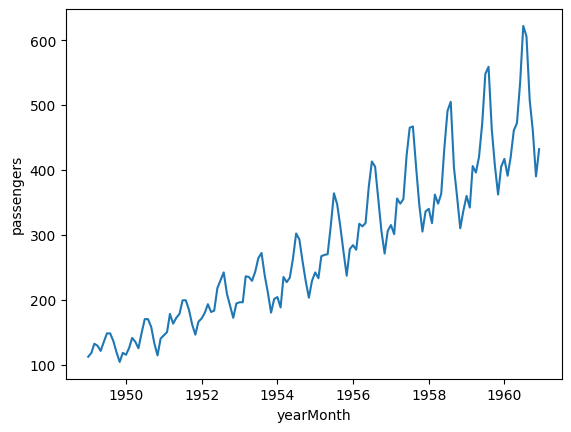

In [131]:
sns.lineplot(data = df,x = df.index, y = df.passengers)

### Stationarity Check - Rolling Mean , ADF Test

In [132]:
df['rollMean'] = df.passengers.rolling(window = 12).mean()
df['rollStd'] = df.passengers.rolling(window = 12).std()

<Axes: xlabel='yearMonth', ylabel='passengers'>

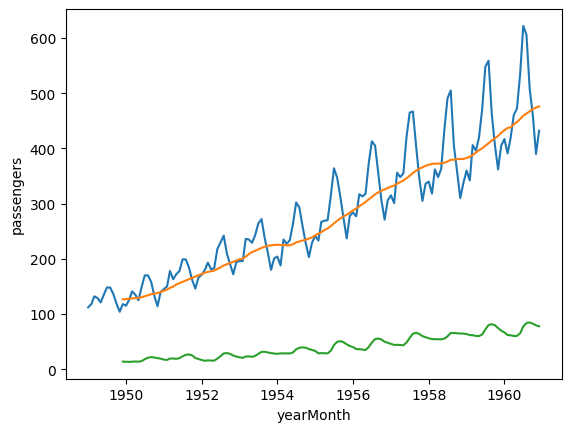

In [133]:
sns.lineplot(data = df,x = df.index, y = df.passengers)
sns.lineplot(data = df,x = df.index, y = df.rollMean)
sns.lineplot(data = df,x = df.index, y = df.rollStd)

In [134]:
from statsmodels.tsa.stattools import adfuller

In [135]:
adfTest = adfuller(df['passengers'],autolag='AIC')
print(adfTest)

(0.8153688792060498, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [136]:
stats = pd.Series(adfTest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
stats

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64

In [137]:
for key,value in adfTest[4].items():
    print('criticality',key,":",value)

criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


In [138]:
def test_stationarity(dataFrame,var):
    dataFrame['rollMean'] = dataFrame[var].rolling(window = 12).mean()
    dataFrame['rollStd'] = dataFrame[var].rolling(window = 12).std()

    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(dataFrame[var],autolag='AIC')
    stats = pd.Series(adfTest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print(stats)

    for key,value in adfTest[4].items():
        print('criticality',key,":",value)

    sns.lineplot(data = dataFrame,x = dataFrame.index, y = var)
    sns.lineplot(data = dataFrame,x = dataFrame.index, y = 'rollMean')
    sns.lineplot(data = dataFrame,x = dataFrame.index, y = 'rollStd')

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


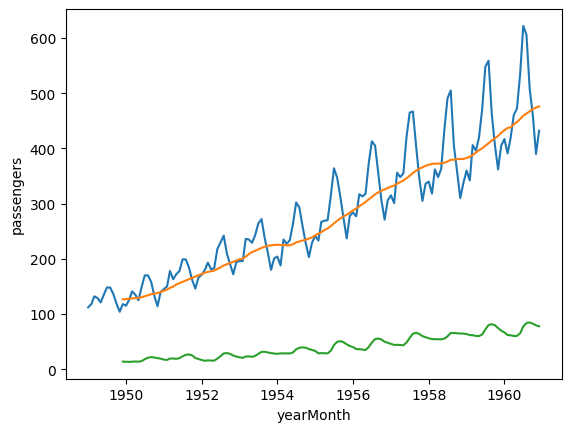

In [139]:
test_stationarity(df,'passengers')

### Making the Data Stationary -> Time Shift , Log , Square root and Cube root

In [140]:
air_df = df[['passengers']]
air_df.head()

,passengers
yearMonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [141]:
air_df['shift'] = air_df.passengers.shift(1)

<ipython-input-141-67a8170110c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shift'] = air_df.passengers.shift(1)


In [142]:
air_df['shiftdiff'] = air_df['passengers'] - air_df['shift']

<ipython-input-142-7f49bc45ad87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shiftdiff'] = air_df['passengers'] - air_df['shift']


In [143]:
air_df.head()

,passengers,shift,shiftdiff
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0


<ipython-input-138-c49f416c4369>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window = 12).mean()
<ipython-input-138-c49f416c4369>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window = 12).std()


Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


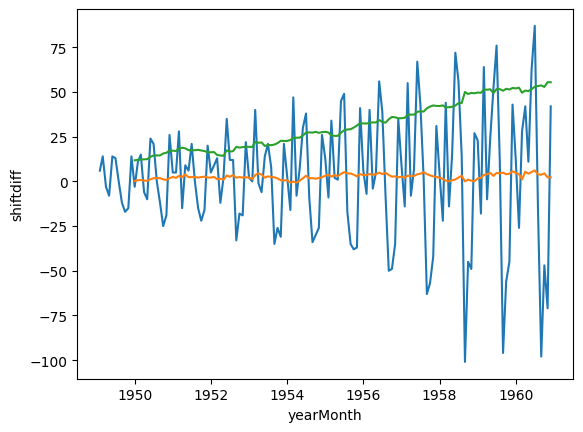

In [144]:
test_stationarity(air_df.dropna(),'shiftdiff')

In [145]:
log_df = df[['passengers']]
log_df['log'] = np.log(log_df['passengers'])

<ipython-input-145-a490f41c5d3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['log'] = np.log(log_df['passengers'])


In [146]:
log_df.head()

,passengers,log
yearMonth,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


<ipython-input-138-c49f416c4369>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window = 12).mean()
<ipython-input-138-c49f416c4369>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window = 12).std()


Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


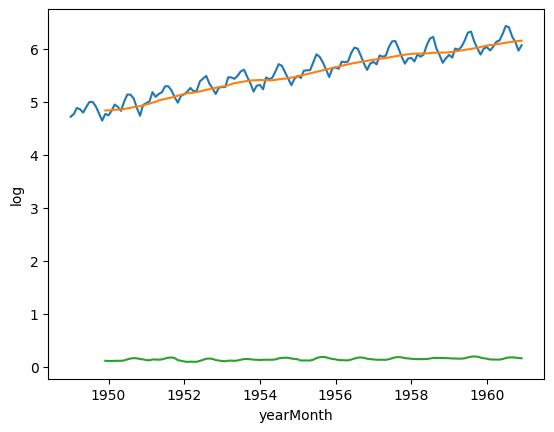

In [147]:
test_stationarity(log_df,'log')

In [148]:
sqrt_df = df[['passengers']]
sqrt_df['sqrt'] = np.sqrt(sqrt_df['passengers'])

<ipython-input-148-87aca9c134f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqrt_df['sqrt'] = np.sqrt(sqrt_df['passengers'])


In [149]:
sqrt_df.head()

,passengers,sqrt
yearMonth,,
1949-01-01,112,10.583005
1949-02-01,118,10.862780
1949-03-01,132,11.489125
1949-04-01,129,11.357817
1949-05-01,121,11.000000


<ipython-input-138-c49f416c4369>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window = 12).mean()
<ipython-input-138-c49f416c4369>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window = 12).std()


Test Statistic                  -0.345854
p-value                          0.918754
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


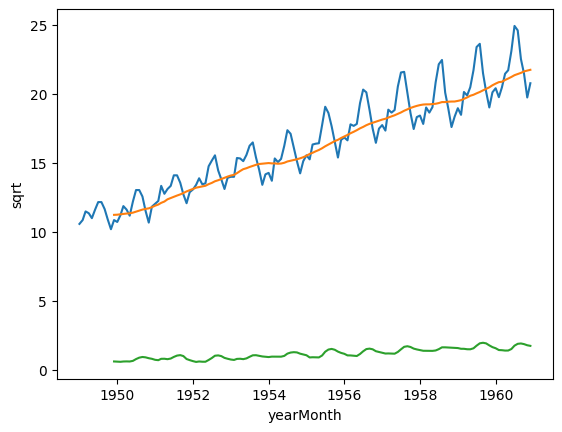

In [150]:
test_stationarity(sqrt_df,'sqrt')

In [151]:
cbrt_df = df[['passengers']]
cbrt_df['cbrt'] = np.cbrt(cbrt_df['passengers'])

<ipython-input-151-feaa2a1977cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbrt_df['cbrt'] = np.cbrt(cbrt_df['passengers'])


In [152]:
cbrt_df.head()

,passengers,cbrt
yearMonth,,
1949-01-01,112,4.820285
1949-02-01,118,4.904868
1949-03-01,132,5.091643
1949-04-01,129,5.052774
1949-05-01,121,4.946087


<ipython-input-138-c49f416c4369>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window = 12).mean()
<ipython-input-138-c49f416c4369>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window = 12).std()


Test Statistic                  -0.810035
p-value                          0.816157
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


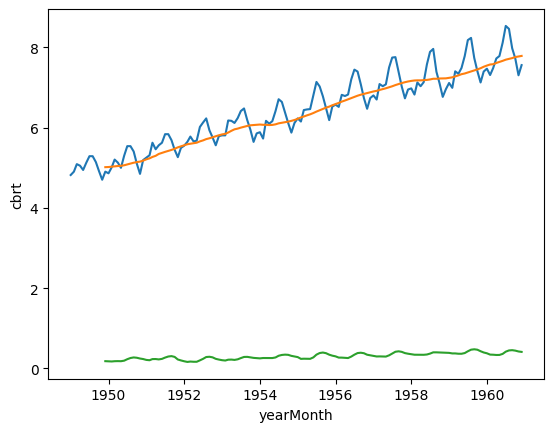

In [153]:
test_stationarity(cbrt_df,'cbrt')

In [154]:
log_df2 = log_df[['passengers','log']]
log_df2['log_sqrt'] = np.sqrt(log_df['log'])
log_df2['logshiftDiff'] = log_df2['log_sqrt'] - log_df2['log_sqrt'].shift(1)

<ipython-input-154-23bc99c0b40d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df2['log_sqrt'] = np.sqrt(log_df['log'])


In [155]:
log_df2.head()

,passengers,log,log_sqrt,logshiftDiff
yearMonth,,,,
1949-01-01,112,4.718499,2.172211,NaN
1949-02-01,118,4.770685,2.184190,0.011979
1949-03-01,132,4.882802,2.209706,0.025517
1949-04-01,129,4.859812,2.204498,-0.005208
1949-05-01,121,4.795791,2.189929,-0.014569


Test Statistic                  -1.942528
p-value                          0.312326
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


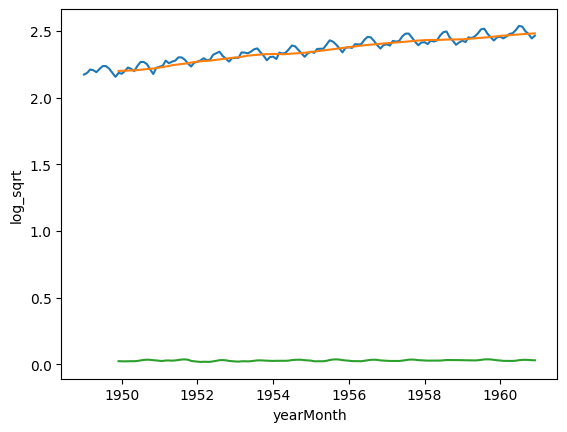

In [156]:
test_stationarity(log_df2,'log_sqrt')

<ipython-input-138-c49f416c4369>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window = 12).mean()
<ipython-input-138-c49f416c4369>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window = 12).std()


Test Statistic                  -3.079116
p-value                          0.028138
#Lags Used                      13.000000
Number of Observations Used    119.000000
dtype: float64
criticality 1% : -3.4865346059036564
criticality 5% : -2.8861509858476264
criticality 10% : -2.579896092790057


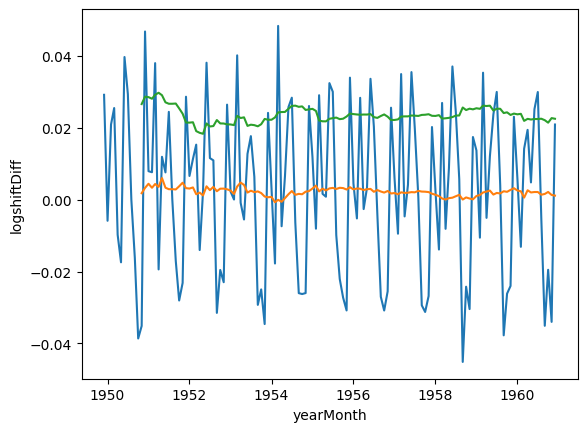

In [157]:
test_stationarity(log_df2.dropna(),'logshiftDiff')

In [158]:
airP = df[['passengers']].copy(deep=True)
airP['firstdiff'] = airP['passengers'].shift(1)
airP['Diff12'] = airP['passengers'].diff(12)

In [159]:
airP.head()

,passengers,firstdiff,Diff12
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,NaN
1949-03-01,132,118.0,NaN
1949-04-01,129,132.0,NaN
1949-05-01,121,129.0,NaN


### Using ARIMA and SARIMAX (Partial auto correlation , Auto Correlation)

In [160]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

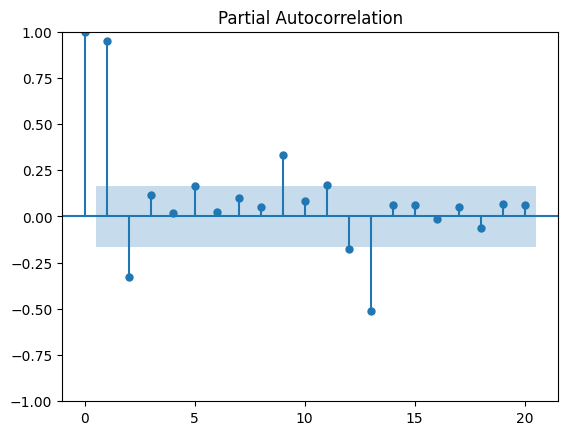

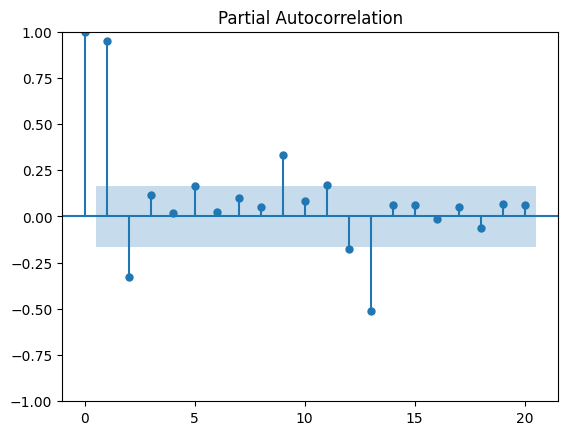

In [161]:
plot_pacf(airP['firstdiff'].dropna(),lags=20)

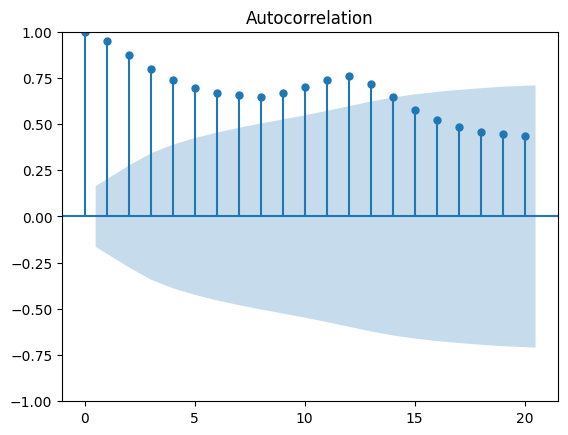

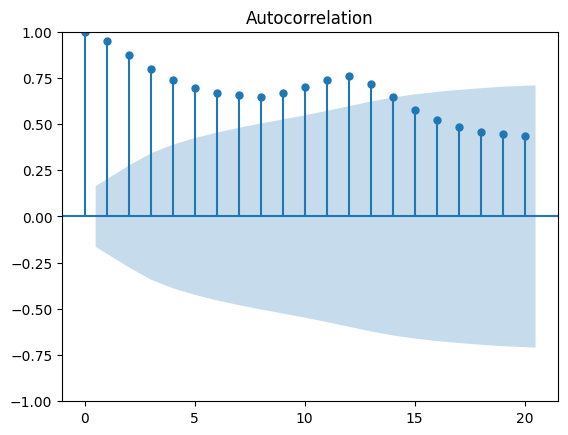

In [162]:
plot_acf(airP['firstdiff'].dropna(),lags=20)

In [163]:
train = airP[:round(len(airP)*70/100)]
train.tail()

,passengers,firstdiff,Diff12
yearMonth,,,
1957-01-01,315,306.0,31.0
1957-02-01,301,315.0,24.0
1957-03-01,356,301.0,39.0
1957-04-01,348,356.0,35.0
1957-05-01,355,348.0,37.0


In [164]:
test = airP[round(len(airP)*70/100):]
test.head()

,passengers,firstdiff,Diff12
yearMonth,,,
1957-06-01,422,355.0,48.0
1957-07-01,465,422.0,52.0
1957-08-01,467,465.0,62.0
1957-09-01,404,467.0,49.0
1957-10-01,347,404.0,41.0


In [165]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['passengers'],order=(1,1,3))
model_fit = model.fit()
prediction = model_fit.predict(start = test.index[0],end = test.index[-1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [167]:
airP["arimaPrediction"] = prediction

In [169]:
airP.tail()

,passengers,firstdiff,Diff12,arimaPrediction
yearMonth,,,,
1960-08-01,606,622.0,47.0,341.111333
1960-09-01,508,606.0,45.0,341.111333
1960-10-01,461,508.0,54.0,341.111333
1960-11-01,390,461.0,28.0,341.111333
1960-12-01,432,390.0,27.0,341.111333


<Axes: xlabel='yearMonth', ylabel='passengers'>

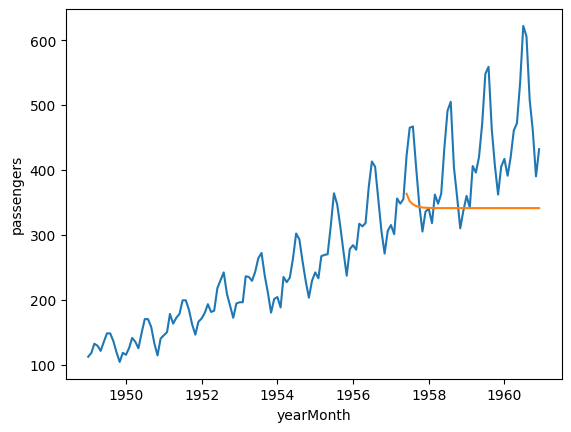

In [172]:
airP.dropna()
sns.lineplot(data = airP,x = airP.index, y = 'passengers')
sns.lineplot(data = airP,x = airP.index, y = 'arimaPrediction')

In [173]:
from sklearn.metrics import mean_squared_error

In [175]:
np.sqrt(mean_squared_error(test['passengers'],prediction))

111.1101033142743

In [176]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

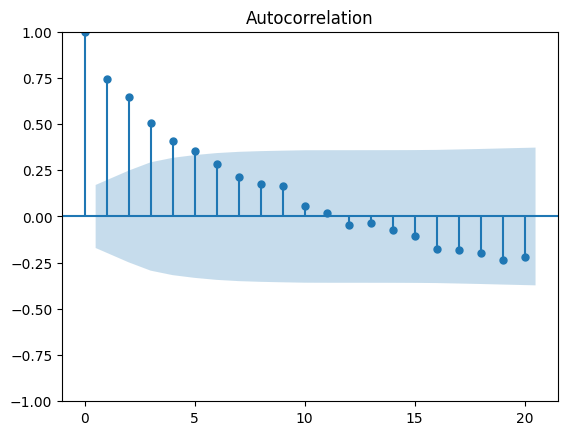

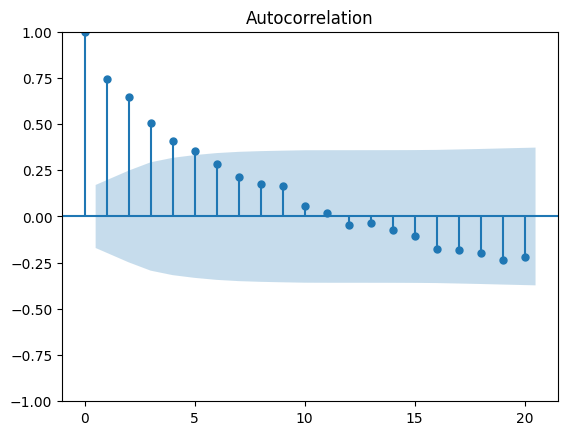

In [180]:
plot_acf(airP['Diff12'].dropna(),lags=20)

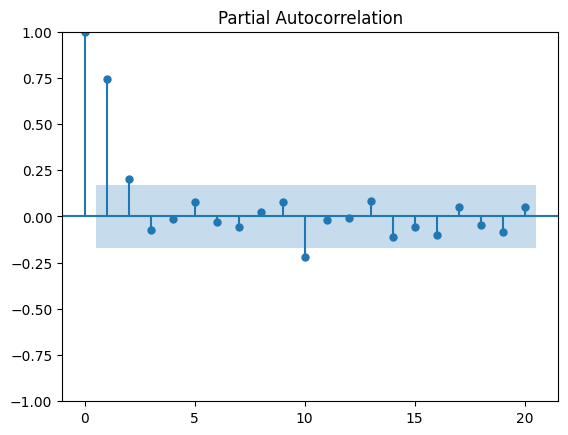

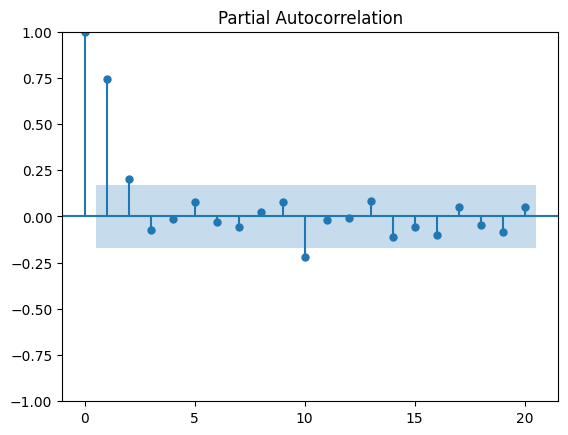

In [179]:
plot_pacf(airP['Diff12'].dropna(),lags=20)

In [181]:
model = SARIMAX(train['passengers'],order=(1,1,3),seasonal_order=(1,1,3,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [182]:
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [183]:
prediction = model_fit.predict(start = test.index[0],end = test.index[-1])

In [184]:
airP["sarimaPrediction"] = prediction

In [185]:
airP.tail()

,passengers,firstdiff,Diff12,arimaPrediction,sarimaPrediction
yearMonth,,,,,
1960-08-01,606,622.0,47.0,341.111333,599.426270
1960-09-01,508,606.0,45.0,341.111333,534.545059
1960-10-01,461,508.0,54.0,341.111333,479.577349
1960-11-01,390,461.0,28.0,341.111333,431.919762
1960-12-01,432,390.0,27.0,341.111333,477.429250


<Axes: xlabel='yearMonth', ylabel='passengers'>

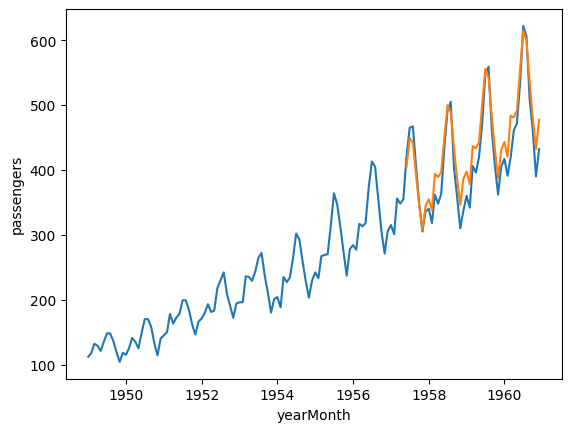

In [186]:
airP.dropna()
sns.lineplot(data = airP,x = airP.index, y = 'passengers')
sns.lineplot(data = airP,x = airP.index, y = 'sarimaPrediction')

In [187]:
np.sqrt(mean_squared_error(test['passengers'],prediction))

27.68175159393607

### Exterpolating for Future

In [190]:
futureDate = pd.DataFrame(pd.date_range(start='1961-01-01',end='1962-01-01', freq='MS'), columns = ['Dates'])

In [191]:
futureDate.set_index('Dates',inplace=True)

In [192]:
futureDate.head()

""
Dates
1961-01-01
1961-02-01
1961-03-01
1961-04-01
1961-05-01


In [193]:
model_fit.predict(start =futureDate.index[0],end = futureDate.index[-1])

1961-01-01    491.479734
1961-02-01    465.650363
1961-03-01    533.740154
1961-04-01    531.203124
1961-05-01    543.259106
1961-06-01    613.612297
1961-07-01    675.940265
1961-08-01    658.768083
1961-09-01    589.073556
1961-10-01    530.177728
1961-11-01    479.466249
1961-12-01    527.711629
1962-01-01    542.911689
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: xlabel='yearMonth', ylabel='passengers'>

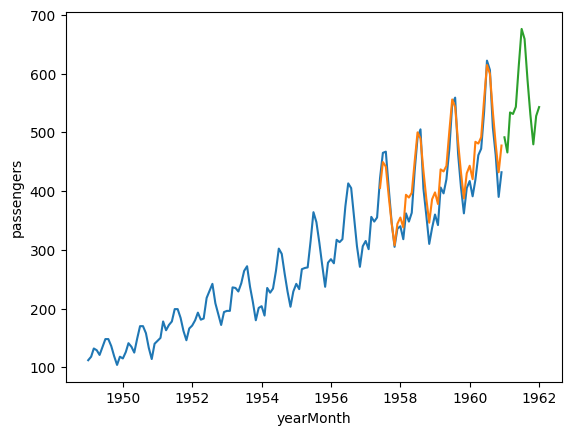

In [194]:
airP.dropna()
sns.lineplot(data = airP,x = airP.index, y = 'passengers')
sns.lineplot(data = airP,x = airP.index, y = 'sarimaPrediction')
sns.lineplot(data = futureDate,x = futureDate.index, y = model_fit.predict(start =futureDate.index[0],end = futureDate.index[-1]))

## Time Series Analysis with **LSTM** Neural Network

In [197]:
orig_df = df[['passengers']]

In [198]:
len(orig_df)

144

In [199]:
train = orig_df[:round(len(airP)*70/100)]
train.tail()

,passengers
yearMonth,
1957-01-01,315
1957-02-01,301
1957-03-01,356
1957-04-01,348
1957-05-01,355


In [200]:
test = orig_df[round(len(airP)*70/100):]
test.head()

,passengers
yearMonth,
1957-06-01,422
1957-07-01,465
1957-08-01,467
1957-09-01,404
1957-10-01,347


In [201]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [203]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [205]:
scaled_train[:10]

array([[0.02588997],
       [0.04530744],
       [0.09061489],
       [0.08090615],
       [0.05501618],
       [0.10032362],
       [0.14239482],
       [0.14239482],
       [0.10355987],
       [0.04854369]])

In [206]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [209]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [210]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.02588997 0.04530744 0.09061489 0.08090615 0.05501618 0.10032362
 0.14239482 0.14239482 0.10355987 0.04854369 0.         0.04530744]
Predict this y: 
 [[0.03559871]]


In [211]:
X.shape

(1, 12, 1)

In [212]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [213]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [214]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [215]:
model.fit(generator,epochs=50)

Epoch 1/50
89/89 [==============================] - 4s 16ms/step - loss: 0.0470
Epoch 2/50
89/89 [==============================] - 1s 16ms/step - loss: 0.0139
Epoch 3/50
89/89 [==============================] - 2s 18ms/step - loss: 0.0125
Epoch 4/50
89/89 [==============================] - 2s 18ms/step - loss: 0.0121
Epoch 5/50
89/89 [==============================] - 1s 8ms/step - loss: 0.0136
Epoch 6/50
89/89 [==============================] - 1s 8ms/step - loss: 0.0115
Epoch 7/50
89/89 [==============================] - 1s 8ms/step - loss: 0.0104
Epoch 8/50
89/89 [==============================] - 1s 8ms/step - loss: 0.0111
Epoch 9/50
89/89 [==============================] - 1s 8ms/step - loss: 0.0079
Epoch 10/50
89/89 [==============================] - 1s 8ms/step - loss: 0.0102
Epoch 11/50
89/89 [==============================] - 1s 8ms/step - loss: 0.0080
Epoch 12/50
89/89 [==============================] - 1s 8ms/step - loss: 0.0071
Epoch 13/50
89/89 [==========================

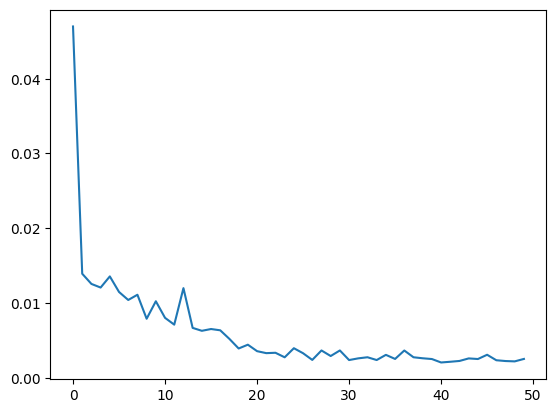

In [217]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [218]:
last_train_batch = scaled_train[-12:]

In [219]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [220]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 361ms/step


array([[0.9746581]], dtype=float32)

In [221]:
scaled_test[0]

array([1.02912621])

In [222]:
test_predictons = []
first_batch = scaled_train[-n_input:]
current_batch = first_batch.reshape((1, n_input, n_features))
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictons.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 40ms/step


In [223]:
test_predictons

[array([0.9746581], dtype=float32),
 array([1.0753869], dtype=float32),
 array([1.0543448], dtype=float32),
 array([0.9226186], dtype=float32),
 array([0.7565221], dtype=float32),
 array([0.6994034], dtype=float32),
 array([0.719077], dtype=float32),
 array([0.7204207], dtype=float32),
 array([0.74446666], dtype=float32),
 array([0.8100222], dtype=float32),
 array([0.8426436], dtype=float32),
 array([0.9230413], dtype=float32),
 array([1.0478951], dtype=float32),
 array([1.1259936], dtype=float32),
 array([1.1216078], dtype=float32),
 array([1.0137674], dtype=float32),
 array([0.87759244], dtype=float32),
 array([0.80689615], dtype=float32),
 array([0.77951795], dtype=float32),
 array([0.7695473], dtype=float32),
 array([0.78761613], dtype=float32),
 array([0.8263212], dtype=float32),
 array([0.88411164], dtype=float32),
 array([0.9814031], dtype=float32),
 array([1.088657], dtype=float32),
 array([1.1562304], dtype=float32),
 array([1.1671162], dtype=float32),
 array([1.0989374], dtyp

In [224]:
true_predictions = scaler.inverse_transform(test_predictons)

In [225]:
test['LSTM_Prediction'] = true_predictions

<ipython-input-225-5c30afadc78c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM_Prediction'] = true_predictions


<Axes: xlabel='yearMonth'>

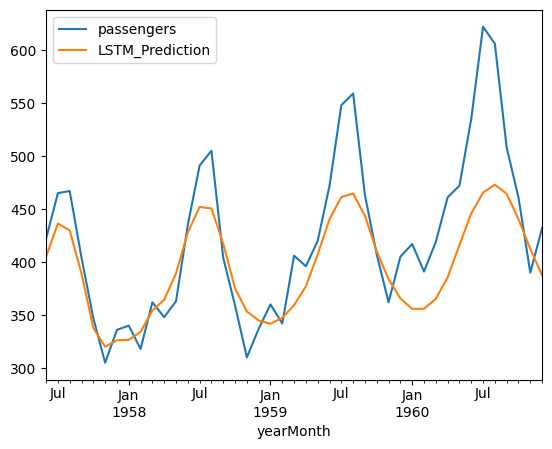

In [226]:
test.plot()

In [227]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test['passengers'],test['LSTM_Prediction']))

49.65694618268369